This code is used to plot ADP data. The main goal is to plot velocities and signal amplitude profiles to ensure velocities aren't biased due to signal interference (kelp). 

In [415]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import csv
import os
from os import listdir


In [416]:
#set the path to ADP files
path = 'C:/Users/steve/Desktop/Thesis/ADP files/10.13.16'
#the file group is the date format created by the ADP export. All related files will have the same name with different extensions 
file_group = 'SWC0610131207'
# the title is simply the title for the figures, but they are put in a high cell so changes can be made without scrolling. 
title= 'Clearing: Block 3 site 12- 10.13'
#same idea as above for the savetitle, I couldn't use the title as the save name because the spaces were causing error
savetitle = 'Clearing_B3S12_10.13'
# change to the path dir
os.chdir(path)
#load up files
sig_amp1 = '%s.a1'% file_group
sig_amp2 = '%s.a2'% file_group
sig_amp3 = '%s.a3'% file_group
VelocityN = '%s.VN'% file_group
VelocityE = '%s.VE'% file_group
VelocityU = '%s.VU'% file_group
SN1 ='%s.SN1'% file_group
SN2='%s.SN2'% file_group
SN3='%s.SN3'% file_group
SD1 = '%s.SD1'% file_group
SD2 = '%s.SD2'% file_group
SD3 = '%s.SD3'% file_group
AverageV = '%s.dav'% file_group


In [417]:
#make files into dataframes then transpose. The index is to get rid of the profile number as header.
amp1 = pd.read_csv(sig_amp1, delimiter='\s+', header=None)
amp2 = pd.read_csv(sig_amp2, delimiter='\s+', header=None)
amp3 = pd.read_csv(sig_amp3, delimiter='\s+', header=None)
beam1=np.transpose(amp1)[1:]
beam2=np.transpose(amp2)[1:]
beam3=np.transpose(amp3)[1:]
VN = pd.read_csv(VelocityN, delimiter='\s+', header=None)
VN = np.transpose(VN)[1:]
VE = pd.read_csv(VelocityE, delimiter='\s+', header=None)
VE = np.transpose(VE)[1:]
VU = pd.read_csv(VelocityU, delimiter='\s+', header=None)
VU = np.transpose(VU)[1:]
SN1= pd.read_csv(SN1, delimiter='\s+', header=None)
SN1 = np.transpose(SN1)[1:]
SN2= pd.read_csv(SN2, delimiter='\s+', header=None)
SN2 = np.transpose(SN2)[1:]
SN3= pd.read_csv(SN3, delimiter='\s+', header=None)
SN3 = np.transpose(SN3)[1:]

SD1= pd.read_csv(SD1, delimiter='\s+', header=None)
SD1 = np.transpose(SD1)[1:]
SD2= pd.read_csv(SD2, delimiter='\s+', header=None)
SD2 = np.transpose(SD2)[1:]
SD3= pd.read_csv(SD3, delimiter='\s+', header=None)
SD3 = np.transpose(SD3)[1:]
#AverageV = pd.read_csv(AverageV, delimiter='/s+', header=None)
#AverageV = np.transpose(AverageV)[1:]

In [418]:
x_ticks = np.arange(.7, 16, .7) # Bins to depth in meters
#print(np.shape(x_ticks))
#print(AverageV)

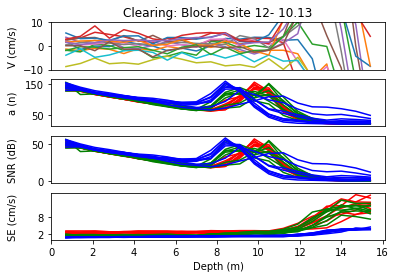

In [419]:
#this is used to set the x axis. The profiles are in 23 bins, each bin is .7m. Now the x axis can be in terms of depth(m)

#plot figure of signal amplitudes
plt.figure()
plt.subplot(412)
axis = plt.gca()
axis.yaxis.set_label_coords(-.1,.5)
plt.ylabel('a (n)')

plt.yticks([50,150])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.plot(x_ticks,beam1, 'r-')
plt.plot(x_ticks,beam2, 'g-')
plt.plot(x_ticks,beam3, 'b-')
# plot figure of velocities 

plt.subplot(411)
plt.title(title)
axis = plt.gca()
axis.yaxis.set_label_coords(-.1,.5)
plt.ylabel('V (cm/s)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.xticks(np.arange(min(x_ticks), max(x_ticks)))
plt.ylim(ymax=10, ymin = -10)
plt.plot(x_ticks,VN)
plt.plot(x_ticks,VE)
#plt.plot(VU)
#plt.legend(beam1)

plt.subplot(413)
axis = plt.gca()
axis.yaxis.set_label_coords(-.1,.5)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.ylabel('SNR (dB)')
plt.plot(x_ticks,SN1, 'r-')
plt.plot(x_ticks,SN2, 'g-')
plt.plot(x_ticks,SN3, 'b-')

plt.subplot(414)
axis = plt.gca()
plt.ylabel('SE (cm/s)')
axis.yaxis.set_label_coords(-.1,.5)
plt.yticks([2,8 ])
plt.xlabel('Depth (m)')
plt.plot(x_ticks, SD1, 'r-')
plt.plot(x_ticks,SD2, 'g-')
plt.plot(x_ticks,SD3, 'b-')
plt.savefig(savetitle + '.tif', dpi=1000)
plt.savefig(savetitle + '.jpg', dpi=1000)
plt.show()
